In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)


/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high       low     close   volume  \
2017-08-14 21:45:00  159.4792  159.6300  158.7700  159.0900  1400128   
2017-08-14 22:00:00  159.1000  159.3800  158.9000  159.2650  1009525   
2017-08-14 22:15:00  159.2700  159.7300  159.2050  159.2200  1104813   
2017-08-14 22:30:00  159.2152  159.4353  159.2150  159.2600   546638   
2017-08-14 22:45:00  159.2600  159.5300  159.2600  159.4350   556516   
2017-08-14 23:00:00  159.4400  159.6000  159.3200  159.5040   562634   
2017-08-14 23:15:00  159.5000  159.5067  159.2100  159.3000   478202   
2017-08-14 23:30:00  159.2950  159.5000  159.1500  159.4646   537703   
2017-08-14 23:45:00  159.4800  159.5000  159.2500  159.2700   338905   
2017-08-15 00:00:00  159.2700  159.3800  159.2000  159.3200   372649   
2017-08-15 00:15:00  159.3200  159.4200  159.1300  159.1400   353429   
2017-08-15 00:30:00  159.1499  159.3100  159.0800  159.1576   278415   
2017-08-15 00:45:00  159.1600  159.2500  159.0500  159.2000   31

                          open       high        low      close  volume  \
2017-08-14 21:45:00   978.5300   981.9200   977.6600   977.6900  165739   
2017-08-14 22:00:00   977.9500   980.0000   976.1900   978.9990  153670   
2017-08-14 22:15:00   978.8280   980.5000   978.7052   979.9000   90104   
2017-08-14 22:30:00   979.9999   984.4900   979.9999   983.6200  151838   
2017-08-14 22:45:00   983.5491   984.3690   983.0000   983.6700   91582   
2017-08-14 23:00:00   983.8100   985.5000   983.5100   983.9400   94056   
2017-08-14 23:15:00   983.7439   984.2000   983.0901   983.9850   30618   
2017-08-14 23:30:00   984.3800   984.3800   981.6800   982.7900   84051   
2017-08-14 23:45:00   982.9700   983.7400   981.7800   981.8700   45156   
2017-08-15 00:00:00   982.0800   982.3900   980.6300   981.7600   55806   
2017-08-15 00:15:00   981.7200   983.0000   981.4200   982.4400   61109   
2017-08-15 00:30:00   982.8100   982.8600   981.3900   981.7600   54881   
2017-08-15 00:45:00   981

                         open      high       low     close   volume  \
2017-12-20 22:30:00  118.6600  118.7100  118.6600  118.7000    43248   
2017-12-20 22:45:00  118.9500  119.1200  117.5600  117.8200    69261   
2017-12-20 23:00:00  117.8200  118.3200  117.7700  118.2300   163492   
2017-12-20 23:15:00  118.2200  118.4200  118.0900  118.1800    49993   
2017-12-20 23:30:00  118.1800  118.2452  118.0600  118.2400    40796   
2017-12-20 23:45:00  118.2400  118.2500  118.0000  118.1000    43877   
2017-12-21 00:00:00  118.1300  118.2400  118.0500  118.1200    41672   
2017-12-21 00:15:00  118.1101  118.2100  118.0600  118.0600    32619   
2017-12-21 00:30:00  118.0874  118.1400  117.9200  118.0899    28223   
2017-12-21 00:45:00  118.0900  118.0900  117.9300  118.0500    31569   
2017-12-21 01:00:00  118.0500  118.1700  117.9900  118.0050    28177   
2017-12-21 01:15:00  118.0108  118.0900  117.9000  118.0000    87431   
2017-12-21 01:30:00  117.9850  118.1000  117.9850  118.0200    4

                          open       high        low      close  volume  \
2017-08-14 21:45:00   940.1200   941.0400   936.8300   937.5400   58321   
2017-08-14 22:00:00   937.5400   937.9700   934.4850   936.5900   54367   
2017-08-14 22:15:00   936.9849   939.0600   936.8000   937.5300   37324   
2017-08-14 22:30:00   937.8700   938.9900   937.7100   938.2600   18197   
2017-08-14 22:45:00   938.4700   939.0320   938.2500   939.0320   18797   
2017-08-14 23:00:00   939.1026   940.6400   938.6600   938.9400   23105   
2017-08-14 23:15:00   938.7200   939.1804   937.2528   937.5100   22796   
2017-08-14 23:30:00   937.4700   938.4800   936.3500   938.0600   17757   
2017-08-14 23:45:00   938.1600   939.4000   938.0300   938.0300   20762   
2017-08-15 00:00:00   938.5400   939.4800   938.4037   939.3700   15615   
2017-08-15 00:15:00   939.1890   939.9500   939.0900   939.2050   15381   
2017-08-15 00:30:00   939.2500   939.8000   938.6945   938.6945   13825   
2017-08-15 00:45:00   938

                         open      high       low     close   volume  \
2017-08-14 21:45:00   73.2400   73.5400   73.1300   73.4100  1251715   
2017-08-14 22:00:00   73.4200   73.4600   73.2307   73.3200   706012   
2017-08-14 22:15:00   73.3250   73.5400   73.3201   73.3700   805056   
2017-08-14 22:30:00   73.3700   73.4800   73.3650   73.4443   449097   
2017-08-14 22:45:00   73.4400   73.6400   73.4100   73.6290   621930   
2017-08-14 23:00:00   73.6300   73.6700   73.5300   73.5301   499810   
2017-08-14 23:15:00   73.5300   73.6100   73.5200   73.6037   367909   
2017-08-14 23:30:00   73.6050   73.6100   73.4900   73.5613   416377   
2017-08-14 23:45:00   73.5650   73.6000   73.5200   73.5300   404542   
2017-08-15 00:00:00   73.5400   73.5700   73.4700   73.5000   375838   
2017-08-15 00:15:00   73.5000   73.5800   73.4800   73.5600   316364   
2017-08-15 00:30:00   73.5600   73.6000   73.5200   73.5300   274514   
2017-08-15 00:45:00   73.5350   73.5500   73.4900   73.5400   26

                         open      high       low     close   volume  \
2017-08-14 21:45:00  169.7600  169.9800  169.5500  169.6600   546188   
2017-08-14 22:00:00  169.6798  169.9500  169.2900  169.8800   651483   
2017-08-14 22:15:00  169.8850  170.4900  169.8850  170.2600   870655   
2017-08-14 22:30:00  170.2600  170.9700  170.2600  170.5900   774877   
2017-08-14 22:45:00  170.5900  170.8852  170.5000  170.7200   462831   
2017-08-14 23:00:00  170.7250  170.9600  170.5900  170.6200   475164   
2017-08-14 23:15:00  170.6300  170.8000  170.5100  170.7900   267672   
2017-08-14 23:30:00  170.7800  170.7881  170.3400  170.6100   299146   
2017-08-14 23:45:00  170.6200  170.7400  170.2700  170.3100   279571   
2017-08-15 00:00:00  170.2700  170.4600  170.2300  170.3600   323025   
2017-08-15 00:15:00  170.3666  170.5099  170.2900  170.3400   250392   
2017-08-15 00:30:00  170.3400  170.6000  170.3300  170.4780   189451   
2017-08-15 00:45:00  170.4900  170.5600  170.2400  170.5500   21

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  36.1150  36.2200  36.0900  36.2000   388611     36.20000   
2017-08-14 22:00:00  36.2000  36.2600  36.1750  36.1850   661223     36.19250   
2017-08-14 22:15:00  36.1850  36.2800  36.1500  36.2650   571555     36.22500   
2017-08-14 22:30:00  36.2650  36.3400  36.2500  36.2993   544363     36.28215   
2017-08-14 22:45:00  36.2913  36.3200  36.2550  36.3100   334575     36.30465   
2017-08-14 23:00:00  36.3050  36.3250  36.2200  36.2250   594007     36.26750   
2017-08-14 23:15:00  36.2250  36.2250  36.1400  36.1600   882204     36.19250   
2017-08-14 23:30:00  36.1600  36.2400  36.1300  36.2250   504769     36.19250   
2017-08-14 23:45:00  36.2300  36.3100  36.2300  36.3050   280559     36.26500   
2017-08-15 00:00:00  36.3050  36.3600  36.3000  36.3550   405562     36.33000   
2017-08-15 00:15:00  36.3600  36.4300  36.3500  36.4050   742210     36.38000   
2017-08-15 00:30:00  36.4050

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  31.6900  31.7700  31.6700  31.7650   586194     31.76500   
2017-08-14 22:00:00  31.7700  31.8300  31.7400  31.7700  1059200     31.76750   
2017-08-14 22:15:00  31.7700  31.8300  31.7500  31.8000   731919     31.78500   
2017-08-14 22:30:00  31.8000  31.8700  31.8000  31.8700   535278     31.83500   
2017-08-14 22:45:00  31.8700  31.8900  31.8100  31.8408  1123609     31.85540   
2017-08-14 23:00:00  31.8500  31.8800  31.8430  31.8500   332124     31.84540   
2017-08-14 23:15:00  31.8500  31.8800  31.8300  31.8700   423440     31.86000   
2017-08-14 23:30:00  31.8650  31.8700  31.8100  31.8550   596005     31.86250   
2017-08-14 23:45:00  31.8550  31.8600  31.7800  31.7910   498125     31.82300   
2017-08-15 00:00:00  31.7950  31.8100  31.7600  31.7650   505012     31.77800   
2017-08-15 00:15:00  31.7650  31.8100  31.7600  31.7950   696789     31.78000   
2017-08-15 00:30:00  31.7900

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  41.5300  41.6700  41.4950  41.6700   410176     41.67000   
2017-08-14 22:00:00  41.6700  41.7100  41.6000  41.6750   507186     41.67250   
2017-08-14 22:15:00  41.6800  41.7950  41.6100  41.6600   564393     41.66750   
2017-08-14 22:30:00  41.6600  41.7563  41.6500  41.7450   338237     41.70250   
2017-08-14 22:45:00  41.7500  41.8350  41.7450  41.8200   372063     41.78250   
2017-08-14 23:00:00  41.8300  41.9100  41.8000  41.8300   345577     41.82500   
2017-08-14 23:15:00  41.8350  41.8500  41.6800  41.6800   616747     41.75500   
2017-08-14 23:30:00  41.6800  41.6950  41.5700  41.6100   337072     41.64500   
2017-08-14 23:45:00  41.6100  41.6400  41.5600  41.5850   336676     41.59750   
2017-08-15 00:00:00  41.5850  41.6500  41.5500  41.6300   423217     41.60750   
2017-08-15 00:15:00  41.6390  41.7550  41.6200  41.7500   327471     41.69000   
2017-08-15 00:30:00  41.7450

                         open      high       low     close   volume  \
2017-08-14 21:45:00  160.4700  161.7400  160.2700  160.8900  1675393   
2017-08-14 22:00:00  160.9000  162.0700  160.6000  161.2400  1909191   
2017-08-14 22:15:00  161.2400  162.4500  161.0300  161.9310  1479158   
2017-08-14 22:30:00  161.9600  162.6900  161.7710  162.1478  1187131   
2017-08-14 22:45:00  162.1600  162.4700  161.7500  161.8800   781932   
2017-08-14 23:00:00  161.8900  162.4900  161.7000  161.8720   997672   
2017-08-14 23:15:00  161.8900  163.3600  161.8900  163.3236  1052889   
2017-08-14 23:30:00  163.3133  164.0900  162.9500  164.0768  1176159   
2017-08-14 23:45:00  164.0600  164.3500  163.7600  163.8650   882143   
2017-08-15 00:00:00  163.8400  164.7000  163.6800  164.4015   964533   
2017-08-15 00:15:00  164.4051  165.2200  164.0600  165.0000  1289616   
2017-08-15 00:30:00  164.9600  165.5000  164.7100  165.1477  1000995   
2017-08-15 00:45:00  165.1548  165.8100  165.0410  165.2810   95

                         open      high       low     close   volume  \
2017-08-14 21:45:00  170.7255  171.2900  169.7200  170.2400   397982   
2017-08-14 22:00:00  170.1500  170.3200  169.1600  169.5731   401288   
2017-08-14 22:15:00  169.6200  169.7600  168.8000  169.0150   475729   
2017-08-14 22:30:00  169.0000  170.5000  168.9500  169.9480   506537   
2017-08-14 22:45:00  169.9999  171.4400  169.9800  171.2786   380495   
2017-08-14 23:00:00  171.2800  172.4500  171.2780  171.2900   428698   
2017-08-14 23:15:00  171.2600  171.4400  170.7600  171.0350   282036   
2017-08-14 23:30:00  170.9950  171.1600  170.8000  171.0700   126353   
2017-08-14 23:45:00  171.0800  171.3500  170.3100  170.3600   186056   
2017-08-15 00:00:00  170.3300  170.6000  169.8900  170.0604   196438   
2017-08-15 00:15:00  170.0660  170.1400  169.6100  169.8000   186358   
2017-08-15 00:30:00  169.8199  170.3200  169.8199  170.0500   149169   
2017-08-15 00:45:00  170.0773  170.2900  169.9500  170.2568   11

                          open       high        low      close  volume  \
2018-02-27 22:30:00  1884.0000  1884.0000  1884.0000  1884.0000    3311   
2018-02-27 22:45:00  1870.0200  1919.0000  1870.0200  1904.2000    9567   
2018-02-27 23:00:00  1902.2450  1912.2650  1896.8650  1897.9900   21868   
2018-02-27 23:15:00  1902.8100  1903.0100  1892.9200  1892.9200   12981   
2018-02-27 23:30:00  1892.9300  1897.0000  1892.7550  1895.5500    9370   
2018-02-27 23:45:00  1895.4600  1907.8900  1894.3450  1901.8500   10115   
2018-02-28 00:00:00  1902.2100  1907.7600  1896.4850  1903.7000    7035   
2018-02-28 00:15:00  1905.7100  1905.7100  1899.6800  1900.5100    8788   
2018-02-28 00:30:00  1903.2399  1903.2399  1894.5100  1897.0100    4718   
2018-02-28 00:45:00  1900.0000  1903.0800  1896.5000  1900.4000    5424   
2018-02-28 01:00:00  1900.2300  1902.4700  1899.4100  1900.0000    6926   
2018-02-28 01:15:00  1900.4200  1902.9100  1899.7200  1900.4400    7972   
2018-02-28 01:30:00  1899

                         open      high       low     close  volume  \
2017-08-14 21:45:00  148.0000  148.4700  147.9100  148.2900   37870   
2017-08-14 22:00:00  148.3500  148.6300  148.1301  148.4700   32722   
2017-08-14 22:15:00  148.4475  148.9500  148.3400  148.7259   20428   
2017-08-14 22:30:00  148.7072  149.0500  148.6200  148.8150   25535   
2017-08-14 22:45:00  148.8500  149.0500  148.6700  148.8900   20850   
2017-08-14 23:00:00  148.9300  149.1400  148.8600  148.8600   19725   
2017-08-14 23:15:00  148.8200  149.2300  148.7900  149.1400   32766   
2017-08-14 23:30:00  149.1900  149.1900  148.7850  148.8200   41365   
2017-08-14 23:45:00  148.8500  149.0900  148.7100  148.7700   16851   
2017-08-15 00:00:00  148.8100  149.0700  148.7300  149.0700   16278   
2017-08-15 00:15:00  149.0500  149.2200  148.9400  149.1048   20958   
2017-08-15 00:30:00  149.1300  149.2050  148.9900  149.1104   18798   
2017-08-15 00:45:00  149.0950  149.1887  148.9100  149.0960   19508   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  171.2100  171.3300  170.3220  170.9700   44676   
2017-08-14 22:00:00  170.8700  170.9700  170.5300  170.5850   38303   
2017-08-14 22:15:00  170.5850  170.8900  170.5500  170.7380   44732   
2017-08-14 22:30:00  170.8090  170.9300  170.6700  170.8250   44691   
2017-08-14 22:45:00  170.7600  170.9400  170.7100  170.7900   29700   
2017-08-14 23:00:00  170.7850  171.5650  170.7850  171.2400   49386   
2017-08-14 23:15:00  171.1900  171.2600  171.0100  171.2500   54961   
2017-08-14 23:30:00  171.2500  171.2900  170.9800  170.9800   38673   
2017-08-14 23:45:00  171.0000  171.2200  170.9800  171.1601   38082   
2017-08-15 00:00:00  171.1950  171.5500  171.1500  171.5000   42141   
2017-08-15 00:15:00  171.5300  171.7900  171.4600  171.4900   46899   
2017-08-15 00:30:00  171.4910  171.5100  171.3300  171.3500   29374   
2017-08-15 00:45:00  171.3500  171.5400  171.2800  171.4800   24331   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00   81.6700   81.8700   81.4400   81.6300  179201   
2017-08-14 22:00:00   81.5600   82.1600   81.5000   82.0800  233166   
2017-08-14 22:15:00   82.0900   82.1200   81.9800   82.0000  257140   
2017-08-14 22:30:00   82.0000   82.0100   81.7600   81.7700  138358   
2017-08-14 22:45:00   81.7500   81.9200   81.7000   81.8900  111531   
2017-08-14 23:00:00   81.8900   82.0800   81.8300   81.8400   39896   
2017-08-14 23:15:00   81.8200   81.8800   81.7600   81.8194   43219   
2017-08-14 23:30:00   81.8014   81.8100   81.6900   81.7700   35348   
2017-08-14 23:45:00   81.7800   81.8900   81.7700   81.8900   32595   
2017-08-15 00:00:00   81.8800   81.9900   81.8500   81.9800   49701   
2017-08-15 00:15:00   81.9800   82.1000   81.9700   82.0400   67118   
2017-08-15 00:30:00   82.0400   82.0500   81.9350   82.0016   40810   
2017-08-15 00:45:00   81.9800   82.0200   81.9000   81.9000   76765   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  248.3800  249.5300  247.7500  249.3000   77962   
2017-08-14 22:00:00  249.4750  249.7900  248.2650  248.6400   79848   
2017-08-14 22:15:00  248.6100  249.1200  248.1800  248.3900   30229   
2017-08-14 22:30:00  248.4100  249.0500  248.2750  248.4900   35025   
2017-08-14 22:45:00  248.5600  249.3700  248.5600  249.2900   24834   
2017-08-14 23:00:00  249.2950  249.7500  249.2800  249.2900   22580   
2017-08-14 23:15:00  249.2400  249.5000  248.8900  249.3900   29748   
2017-08-14 23:30:00  249.3900  249.5100  249.1200  249.2700   26019   
2017-08-14 23:45:00  249.2700  249.4800  249.2206  249.4100   17355   
2017-08-15 00:00:00  249.3700  249.9900  249.2700  249.9700   25523   
2017-08-15 00:15:00  249.9800  250.2300  249.9200  249.9200   32227   
2017-08-15 00:30:00  249.9000  250.0100  249.6900  249.7300   27682   
2017-08-15 00:45:00  249.7500  249.8400  249.5700  249.7100   12445   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  58.5300  58.7400  58.3400  58.3900   209690     58.39000   
2017-08-14 22:00:00  58.3800  58.5800  58.2710  58.5800   273044     58.48500   
2017-08-14 22:15:00  58.5700  58.6100  58.4900  58.5000   143189     58.54000   
2017-08-14 22:30:00  58.5000  58.6300  58.5000  58.5100   182256     58.50500   
2017-08-14 22:45:00  58.5100  58.6200  58.5000  58.6000   164427     58.55500   
2017-08-14 23:00:00  58.6000  58.7300  58.6000  58.6900   164614     58.64500   
2017-08-14 23:15:00  58.6800  58.7000  58.5950  58.6450   204223     58.66750   
2017-08-14 23:30:00  58.6450  58.6450  58.4600  58.6200   171995     58.63250   
2017-08-14 23:45:00  58.6300  58.7400  58.5900  58.6300   182997     58.62500   
2017-08-15 00:00:00  58.6400  58.7200  58.6200  58.7100    76354     58.67000   
2017-08-15 00:15:00  58.7000  58.8050  58.6700  58.7750   135634     58.74250   
2017-08-15 00:30:00  58.7750

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  72.8600  73.1150  72.7000  72.8300   135423     72.83000   
2017-08-14 22:00:00  72.8400  72.9100  72.6800  72.7650   170384     72.79750   
2017-08-14 22:15:00  72.7700  72.9200  72.7000  72.8700   209481     72.81750   
2017-08-14 22:30:00  72.8700  72.9780  72.7100  72.7400   155507     72.80500   
2017-08-14 22:45:00  72.7500  72.8600  72.6764  72.7600   163185     72.75000   
2017-08-14 23:00:00  72.7600  72.8700  72.7300  72.8000   166355     72.78000   
2017-08-14 23:15:00  72.7963  72.8000  72.7000  72.7400   166219     72.77000   
2017-08-14 23:30:00  72.7400  72.7500  72.5800  72.6000   215497     72.67000   
2017-08-14 23:45:00  72.5900  72.7600  72.5600  72.7100   126324     72.65500   
2017-08-15 00:00:00  72.7170  72.7900  72.7000  72.7900    91946     72.75000   
2017-08-15 00:15:00  72.7900  72.8551  72.6801  72.6900   131069     72.74000   
2017-08-15 00:30:00  72.6900

                         open      high       low     close  volume  \
2017-08-14 21:45:00  156.6700  157.2800  156.6500  156.8000   38868   
2017-08-14 22:00:00  156.8600  157.5250  156.8050  157.5200   55472   
2017-08-14 22:15:00  157.4500  157.6500  157.2650  157.3500   62948   
2017-08-14 22:30:00  157.3400  157.4700  157.0700  157.1200   66737   
2017-08-14 22:45:00  157.1200  157.4200  156.9400  157.4200   38421   
2017-08-14 23:00:00  157.4400  157.6800  157.4000  157.6100   26049   
2017-08-14 23:15:00  157.6130  157.8600  157.5950  157.8400   52373   
2017-08-14 23:30:00  157.8600  158.1000  157.7800  157.9500   69844   
2017-08-14 23:45:00  157.9700  158.0000  157.7200  157.7700   38791   
2017-08-15 00:00:00  157.7700  157.9600  157.7400  157.9200   36619   
2017-08-15 00:15:00  157.9018  157.9700  157.8500  157.9001   27773   
2017-08-15 00:30:00  157.9000  157.9800  157.8000  157.8200   22273   
2017-08-15 00:45:00  157.8100  157.9785  157.7900  157.9500   30213   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  53.1238  53.1600  52.9600  53.1050   191419     53.10500   
2017-08-14 22:00:00  53.1000  53.3400  53.0500  53.2200   379900     53.16250   
2017-08-14 22:15:00  53.2100  53.2300  53.0500  53.1627   272923     53.19135   
2017-08-14 22:30:00  53.1700  53.2400  53.1700  53.1800    96247     53.17135   
2017-08-14 22:45:00  53.1900  53.2500  53.1408  53.2450   160357     53.21250   
2017-08-14 23:00:00  53.2500  53.3800  53.2450  53.3168   334748     53.28090   
2017-08-14 23:15:00  53.3100  53.3100  53.1948  53.1948   238756     53.25580   
2017-08-14 23:30:00  53.1943  53.2071  53.0900  53.0900   188437     53.14240   
2017-08-14 23:45:00  53.1000  53.2445  53.1000  53.2145   187598     53.15225   
2017-08-15 00:00:00  53.2141  53.2400  53.1800  53.1833   167851     53.19890   
2017-08-15 00:15:00  53.1900  53.3500  53.1850  53.3500   121320     53.26665   
2017-08-15 00:30:00  53.3500

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5348360655737705
------------
0.475103734439834
------------
0.527027027027027
------------
0.5213178294573644
------------
0.5150214592274678
------------
0.5192307692307693
------------
0.5348360655737705
------------
0.475103734439834
------------
0.528957528957529
------------
0.5213178294573644
------------
0.5150214592274678
------------
0.5192307692307693
------------
0.5348360655737705
------------
0.47717842323651455
------------
0.527027027027027
------------
0.5232558139534884
------------
0.5150214592274678
------------
0.5192307692307693
------------
0.5368852459016393
------------
0.483402489626556
------------
0.5135135135135135
------------
0.5368217054263565
------------
0.5236051502145923
------------
0.5106837606837606
------------
0.5061475409836066
------------
0.47717842323651455
------------
0.5444015444015444
------------
0.5910852713178295
------------
0.5214592274678111
------------
0.5192307692307693
------------
0.5
------------
0.5
------------
0.5
------

0.501937984496124
------------
0.5107296137339056
------------
0.5427350427350427
------------
0.45491803278688525
------------
0.5103734439834025
------------
0.4189189189189189
------------
0.4844961240310077
------------
0.5600858369098712
------------
0.5213675213675214
------------
0.47950819672131145
------------
0.5103734439834025
------------
0.38803088803088803
------------
0.4748062015503876
------------
0.5450643776824035
------------
0.5021367521367521
------------
0.5020491803278688
------------
0.49377593360995853
------------
0.4980694980694981
------------
0.5058139534883721
------------
0.5300429184549357
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5225409836065574
------------
0.

0.35618729096989965
------------
0.5836177474402731
------------
0.6474820143884892
------------
0.46037735849056605
------------
0.6498257839721254
------------
0.5773195876288659
------------
0.3595317725752508
------------
0.5699658703071673
------------
0.6330935251798561
------------
0.4811320754716981
------------
0.6777003484320557
------------
0.5618556701030928
------------
0.3695652173913043
------------
0.5511945392491467
------------
0.4748201438848921
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.456603

0.49828178694158076
------------
0.4916387959866221
------------
0.4880546075085324
------------
0.48741007194244607
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.46037735849056605
------------
0.6637630662020906
------------
0.5584192439862543
------------
0.3528428093645485
------------
0.5546075085324232
------------
0.5089928057553957
------------
0.4867924528301887
------------
0.6968641114982579
------------
0.5481099656357389
------------
0.3745819397993311
------------
0.5341296928327645
------------
0.48201438848920863
------------
0.5226415094339623
------------
0.5574912891986062
------------
0.5721649484536082
------------
0.6839464882943144
------------
0.6996587030716723
------------
0.3848920863309352

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.6006493506493507
------------
0.31107491856677527
------------
0.4332298136645963
------------
0.4647887323943662
------------
0.7229508196721312
------------
0.4980544747081712
------------
0.49188311688311687
------------
0.495114006514658
------------
0.4984472049689441
------------
0.5017605633802817
------------
0.5049180327868853
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4961089494163424
------------
0.5340909090909091
------------
0.5570032573289903
------------
0.40217391304347827
------------
0.545774647887324
------------
0.7540983606557377
------------
0.5097276264591439
------------
0.5243506493506493
------------
0.34364820846905536
------------
0.4394409937888199
------------
0.551056338028169
--

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6254416961130742
------------
0.58
------------
0.28726708074534163
------------
0.6895161290322581
------------
0.48141263940520446
------------
0.411660777385159
------------
0.6201413427561837
------------
0.58
------------
0.28726708074534163
------------
0.6895161290322581
------------
0.48141263940520446
------------
0.411660777385159
------------
0.6219081272084805
------------
0.58
------------
0.28726708074534163
------------
0.6908602150537635
------------
0.48698884758364314
------------
0.41872791519434627
------------
0.6925795053003534
------------
0.482
------------
0.2453416149068323
------------
0.7298387096774194
------------
0.5910780669144982
------------
0.4840989399293286
------------
0.5371024734982333
------------
0.504
------------
0.5527950310559007
--------

0.7936802973977695
------------
0.8127208480565371
------------
0.558303886925795
------------
0.55
------------
0.5791925465838509
------------
0.3844086021505376
------------
0.7639405204460966
------------
0.5653710247349824
------------
0.5477031802120141
------------
0.56
------------
0.5496894409937888
------------
0.45161290322580644
------------
0.775092936802974
------------
0.7720848056537103
------------
0.3409893992932862
------------
0.542
------------
0.5698757763975155
------------
0.3978494623655914
------------
0.7174721189591078
------------
0.7773851590106007
------------
0.5017667844522968
------------
0.51
------------
0.5
------------
0.4959677419354839
------------
0.5241635687732342
------------
0.7208480565371025
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0

0.4968847352024922
------------
0.5
------------
0.5220264317180616
------------
0.5089928057553957
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.40441176470588236
------------
0.5606694560669456
------------
0.32554517133956384
------------
0.28551532033426186
------------
0.5044052863436124
------------
0.4568345323741007
------------
0.40441176470588236
------------
0.5606694560669456
------------
0.32398753894080995
------------
0.28690807799442897
------------
0.5044052863436124
------------
0.4568345323741007
------------
0.42830882352941174
------------
0.5292887029288703
------------
0.3099688473520249
-----

0.4984423676012461
------------
0.5
------------
0.5220264317180616
------------
0.5179856115107914
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5036764705882353
------------
0.5104602510460251
------------
0.4766355140186916
------------
0.4052924791086351
------------
0.6629955947136564
------------
0.8381294964028777
------------
0.5073529411764706
------------
0.5083682008368201
------------
0.46417445482866043
------------
0.3983286908077994
------------
0.6674008810572687
------------
0.841726618705036
------------
0.5238970588235294
------------
0.5585774058577406
------------
0.35669781931464173
------------
0.4011142061281337
------------
0.6475770925110133
------------
0.8633093525179856
------------
0.57

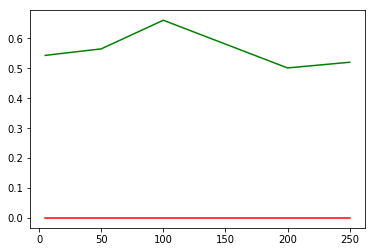

Working on... AMZN
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.52834008097166
------------
0.4941860465116279
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0

0.49612403100775193
------------
0.5042016806722689
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5263157894736842
------------
0.5038759689922481
------------
0.5965909090909091
------------
0.48326359832635984
------------
0.5116279069767442
------------
0.5105042016806722
------------
0.5182186234817814
------------
0.48643410852713176
------------
0.5890151515151515
------------
0.5062761506276151
------------
0.6531007751937985
------------
0.523109243697479
------------
0.5182186234817814
------------
0.5174418604651163
------------
0.615530303030303
------------
0.4707112970711297
------------
0.6414728682170543
------------
0.5378151260504201
------------
0.451417004048583
------------
0.5096899224806202
---

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6280276816608996
------------
0.46178343949044587
------------
0.5057471264367817
------------
0.482258064516129
------------
0.5019305019305019
------------
0.5
------------
0.5951557093425606
------------
0.714968152866242
------------
0.5057471264367817
------------
0.4467741935483871
------------
0.5077220077220077
------------
0.48863636363636365
------------
0.5743944636678201
------------
0.6624203821656051
------------
0.5244252873563219
------------
0.7016129032258065
------------
0.46525096525096526
------------
0.553030303030303
------------
0.6470588235294118
------------
0.6130573248407644
------------
0.3074712643678161
------------
0.6709677419354839
------------
0.525096525096525
------------
0.5454545454545454
------------
0.6955017301038062
------------
0.3662420382165605
------------
0.3017241379310345
------------
0.717741935483871
------------
0.48841698841698844
------------
0.48674242424242425


0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5163934426229508
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5396551724137931
------------
0.4672131147540984
------------
0.4573333333333333
------------
0.421957671957672
------------
0.4590443686006826
------------
0.6038961038961039
------------
0.7844827586206896
------------
0.4180327868852459
------------
0.8413333333333334
------------
0.6838624338624338
------------
0.41638225255972694
------------
0.5735930735930735
------------
0.7655172413793103
------------
0.49836065573770494
------------
0.5
------------
0.5
------------
0.49829351535836175
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------

0.5
------------
0.4253246753246753
------------
0.45685279187817257
------------
0.49515738498789347
------------
0.5030864197530864
------------
0.5
------------
0.4939759036144578
------------
0.42694805194805197
------------
0.4581218274111675
------------
0.49878934624697335
------------
0.5030864197530864
------------
0.5
------------
0.4939759036144578
------------
0.44642857142857145
------------
0.4796954314720812
------------
0.5
------------
0.5015432098765432
------------
0.5
------------
0.4979919678714859
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.7548701298701299
------------
0.4581218274111675
------------
0.48789346246973364
------------
0.5
------------
0.5
------------
0.6847389558232931
------------
0.7711038961038961
------------
0.4289340101522843
------------
0.42857142857142855
------------
0.3317901234567901
------------
0.5166666666666667
------------
0.8112449799196787
------------
0.49188311688311687
------------
0.44543147208121825
------------


------------
0.49859943977591037
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5021834061135371
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5021834061135371
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--

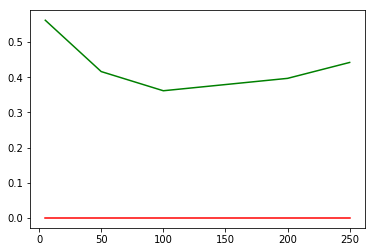

Working on... PEP
0.5074074074074074
------------
0.4965034965034965
------------
0.493006993006993
------------
0.5105633802816901
------------
0.4581005586592179
------------
0.5
------------
0.5074074074074074
------------
0.5034965034965035
------------
0.4965034965034965
------------
0.5105633802816901
------------
0.4553072625698324
------------
0.5
------------
0.5111111111111111
------------
0.4965034965034965
------------
0.5
------------
0.5070422535211268
------------
0.46089385474860334
------------
0.5
------------
0.5
------------
0.4965034965034965
------------
0.5174825174825175
------------
0.5
------------
0.49162011173184356
------------
0.5
------------
0.4962962962962963
------------
0.5559440559440559
------------
0.45454545454545453
------------
0.4964788732394366
------------
0.48044692737430167
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.47202797202797203
------------
0.5
------------
0.48044692737430167
------------
0.5
------------
0.562962962962963
------------
0.5034965034965035
------------
0.506993006993007
------------
0.4894366197183099
------------
0.6452513966480447
------------
0.4623287671232877
------------
0.562962962962963
------------
0.5314685314685315
------------
0.46153846153846156
------------
0.4753521126760563
------------
0.3547486033519553
------------
0.4589041095890411
------------
0.4962962962962963
------------
0.513986013986014
------------
0.5034965034965035
------------
0.5774647887323944
------------
0.3407821229050279
------------
0.4794520547945205
------------
0.5444444444444444
------------
0.479020979020979
-----

0.48188405797101447
------------
0.4479166666666667
------------
0.7926136363636364
------------
0.5
------------
0.822429906542056
------------
0.5
------------
0.463768115942029
------------
0.4375
------------
0.7982954545454546
------------
0.5
------------
0.8317757009345794
------------
0.5
------------
0.4673913043478261
------------
0.3472222222222222
------------
0.8153409090909091
------------
0.5
------------
0.8598130841121495
------------
0.5
------------
0.4782608695652174
------------
0.2951388888888889
------------
0.44886363636363635
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.48579545454545453
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.40625
------------
0.

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4855072463768116
------------
0.2604166666666667
------------
0.6420454545454546
------------
0.6613924050632911
------------
0.6542056074766355
------------
0.5
------------
0.5144927536231884
------------
0.2326388888888889
------------
0.5909090909090909
------------
0.5886075949367089
------------
0.6728971962616822
------------
0.47039473684210525
------------
0.47101449275362317
------------
0.3090277777777778
------------
0.5227272727272727
------------
0.5632911392405063
------------
0.6635514018691588
------------
0.4407894736842105
------------
0.44565217391304346
------------
0.3333333333333333
------------
0.4289772727272727
------------
0.6075949367088608
------------
0.6098130841121495
------------
0.46381578947368424
------------
0.4673913043478261
------------
0.4131944444444444
------------
0.4971590909090909
------------
0.5727848101265823
---------

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.19879518072289157
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.504424778761062
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.504424778761062
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5022123893805309
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---------

0.35517241379310344
------------
0.5602409638554217
------------
0.53125
------------
0.7367256637168141
------------
0.5
------------
0.5381944444444444
------------
0.38620689655172413
------------
0.5843373493975904
------------
0.521875
------------
0.6194690265486725
------------
0.4834123222748815
------------
0.4270833333333333
------------
0.4413793103448276
------------
0.4759036144578313
------------
0.553125
------------
0.6305309734513275
------------
0.7440758293838863
------------
0.4548611111111111
------------
0.44482758620689655
------------
0.7018072289156626
------------
0.571875
------------
0.2831858407079646
------------
0.45023696682464454
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5029761904761905
-----------

0.48484848484848486
------------
0.36496350364963503
------------
0.5119047619047619
------------
0.5833333333333334
------------
0.06299212598425197
------------
0.9803149606299213
------------
0.5113636363636364
------------
0.4416058394160584
------------
0.4880952380952381
------------
0.6185897435897436
------------
0.1968503937007874
------------
0.6889763779527559
------------
0.5113636363636364
------------
0.43795620437956206
------------
0.44345238095238093
------------
0.6698717948717948
------------
0.23622047244094488
------------
0.5551181102362205
------------
0.49242424242424243
------------
0.4781021897810219
------------
0.20833333333333334
------------
0.592948717948718
------------
0.25196850393700787
------------
0.515748031496063
------------
0.5151515151515151
------------
0.5109489051094891
------------
0.2976190476190476
------------
0.3942307692307692
------------
0.5393700787401575
------------
0.8543307086614174
------------
0.5
------------
0.5
------------

0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.5
------------
0.5
------------
0.5167785234899329
------------
0.5
------------
0.736
------------
0.5
------------
0.4927007299270073
------------
0.40816326530612246
------------
0.5637583892617449
------------
0.7422360248447205
------------
0.084
------------
0.5
------------
0.4306569343065693
------------
0.4557823129251701
------------
0.5536912751677853
------------
0.7111801242236024
------------
0.176
------------
0.6590909090909091
------------
0.4854014598540146
------------
0.48299319727891155
------------
0.5201342281879194
------------
0.7080745341614907
------------
0.192
------------
0.21074380165289255
------------
0.5620437956204379
------------
0.4387755102040816
------------
0.4

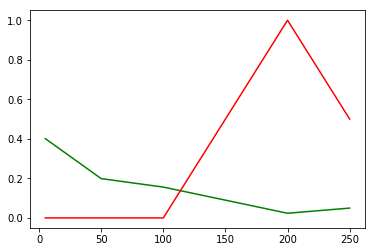

Working on... GOOGL
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4957983193277311
------------
0.5019762845849802
------------
0.5042553191489362
------------
0.5963114754098361
------------
0.4811715481171548
------------
0.4523809523809524
------------
0.5273109243697479
------------
0.616600790513834
------------
0.5063829787234042
------------
0.5594262295081968
------------
0.42887029288702927
------------
0.47023809523809523
------------
0.5504201680672269
------------
0.4644268774703557
------------
0.49148936170212765
------------
0.514344262295082
------------
0.399581589958159
------------
0.5079365079365079
------------
0.5147058823529411
------------
0.5276679841897233
------------
0.5042553191489362
------------
0.5163934426229508
------------
0.4497907949790795
------------
0.5198412698412699
------------
0.5042016806722689
------------
0.5513833992094862
------------
0.5127659574468

0.5
------------
0.6765676567656765
------------
0.5508474576271186
------------
0.5516014234875445
------------
0.5754716981132075
------------
0.5456349206349206
------------
0.5034246575342466
------------
0.66996699669967
------------
0.5508474576271186
------------
0.5533807829181495
------------
0.5773584905660377
------------
0.5416666666666666
------------
0.5051369863013698
------------
0.6617161716171617
------------
0.548728813559322
------------
0.5480427046263345
------------
0.5886792452830188
------------
0.5376984126984127
------------
0.5291095890410958
------------
0.43564356435643564
------------
0.5
------------
0.37722419928825623
------------
0.46037735849056605
------------
0.4880952380952381
------------
0.6044520547945206
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----

0.7226027397260274
------------
0.6831683168316832
------------
0.461864406779661
------------
0.5587188612099644
------------
0.7
------------
0.5099206349206349
------------
0.7037671232876712
------------
0.429042904290429
------------
0.4639830508474576
------------
0.5427046263345195
------------
0.590566037735849
------------
0.4801587301587302
------------
0.6934931506849316
------------
0.49504950495049505
------------
0.4978813559322034
------------
0.498220640569395
------------
0.5
------------
0.49603174603174605
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6518151815181518
------------
0.4216101694915254
------------
0.5889679715302492
------------
0.5
------------
0.5317460317460317
-

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4768211920529801
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5070671378091873
------------
0.7367549668874173
------------
0.7293103448275862
------------
0.4625
------------
0.5015723270440252
------------
0.5917602996254682
------------
0.4098939929328622
------------
0.7533112582781457
------------
0.4827586206896552
------------
0.4946428571

0.7471910112359551
------------
0.5565371024734982
------------
0.5231788079470199
------------
0.42586206896551726
------------
0.36964285714285716
------------
0.39308176100628933
------------
0.5337078651685393
------------
0.4911660777385159
------------
0.4966887417218543
------------
0.4844827586206897
------------
0.5017857142857143
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
Diff in tren train and test
0.5887665198237886
0.54673721340388
Window: 100
[[130 384]
 [173 447]]
Vol pos 2.6809047113849647
Vol neg 1.9637390520683493
F1,score 0.6161268090971744
Accuracy: 0.5088183421516755
0.5670731707317073
------------
0.6197183098591549
----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5670731707317073
------------
0.6197183098591549
------------
0.5721311475409836
------------
0.448559670781893
------------
0.6470588235294118
------------
0.5757042253521126
------------
0.48577235772357724
------------
0.4070422535211268
------------
0.48360655737704916
------------
0.4691358024691358
------------
0.5183823529411765
------------
0.4876760563380282
------------
0.49796747967479676
------------
0.46338028169014084
------------
0.49836065573770494
------------
0.49382716049382713
------------
0.5110294117647058
------------
0.5105633802816901
------------
0.5101626016260162
------------
0.7690140845070422
------------
0.7131147540983607
------------
0.5123456790123457
------------
0.5790441176470589
------------
0.5052816901408451
------------
0.7703252032520326
------------
0.7436619718309859
------------
0.4245901639344262
------------
0.7386831275720165
----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.605191256830601
------------
0.5053571428571428
------------
0.4822222222222222
------------
0.6407563025210085
------------
0.5116279069767442
------------
0.7027027027027027
------------
0.6557377049180327
------------
0.4982142857142857
------------
0.5266666666666666
------------
0.5882352941176471
------------
0.7151162790697675
------------
0.7162162162162162
------------
0.5491803278688525
------------
0.4660714285714286
------------
0.5488888888888889
------------
0.5840336134453782
------------
0.7364341085271318
------------
0.6981981981981982
------------
0.6174863387978142
------------
0.38035714285714284
------------
0.6066666666666667
------------
0.5630252100840336
------------
0.6841085271317829
------------
0.5
------------
0.4931693989071038
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-------

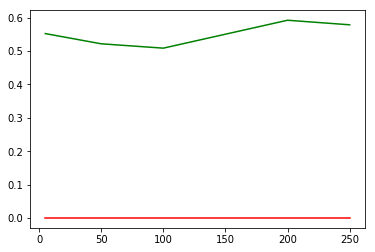

Working on... MSFT
0.5041666666666667
------------
0.5170212765957447
------------
0.4823529411764706
------------
0.4745098039215686
------------
0.5183673469387755
------------
0.5450819672131147
------------
0.5041666666666667
------------
0.5170212765957447
------------
0.4823529411764706
------------
0.4745098039215686
------------
0.5142857142857142
------------
0.5450819672131147
------------
0.50625
------------
0.5127659574468085
------------
0.4823529411764706
------------
0.4764705882352941
------------
0.5142857142857142
------------
0.5430327868852459
------------
0.50625
------------
0.5085106382978724
------------
0.4823529411764706
------------
0.5137254901960784
------------
0.5061224489795918
------------
0.48770491803278687
------------
0.5229166666666667
------------
0.5212765957446809
------------
0.46862745098039216
------------
0.5019607843137255
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5

0.4294117647058823
------------
0.45294117647058824
------------
0.48367346938775513
------------
0.5
------------
0.53125
------------
0.49361702127659574
------------
0.5019607843137255
------------
0.5
------------
0.4959183673469388
------------
0.4979508196721312
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5125
------------
0.5255319148936171
------------
0.4666666666666667
------------
0.4843137254901961
------------
0.5061224489795918
------------
0.5020491803278688
------------
0.5208333333333334
------------
0.5191489361702127
------------
0.5470588235294118
------------
0.4470588235294118
------------
0.5
------------
0.5
------------
0.5166666666666667
------------
0.5127659574468085
------------
0.4745

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4880546075085324
------------
0.5198675496688742
------------
0.5396825396825397
------------
0.48717948717948717
------------
0.5
------------
0.5161870503597122
------------
0.5085324232081911
------------
0.7251655629139073
------------
0.5142857142857142
------------
0.36996336996337
------------
0.5
------------
0.5305755395683454
------------
0.5238907849829352
------------
0.6490066225165563
------------
0.35714285714285715
------------
0.3076923076923077
------------
0.5021186440677966
------------
0.48201438848920863
------------
0.6399317406143344
------------
0.5844370860927153
------------
0.5825396825396826
------------
0.30952380952380953
------------
0.423

0.5
------------
0.5
------------
0.7784256559766763
------------
0.5
------------
0.5
------------
0.49097472924187724
------------
0.5
------------
0.8522388059701492
------------
0.7813411078717201
------------
0.4090909090909091
------------
0.4782608695652174
------------
0.5
------------
0.5088967971530249
------------
0.8313432835820895
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--------

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0

0.30923076923076925
------------
0.563768115942029
------------
0.6417682926829268
------------
0.7441860465116279
------------
0.601123595505618
------------
0.5402476780185759
------------
0.3076923076923077
------------
0.2710144927536232
------------
0.6295731707317073
------------
0.4900332225913621
------------
0.5861423220973783
------------
0.8018575851393189
------------
0.49846153846153846
------------
0.4985507246376812
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.3892307692307692
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5538461538461539
------------
0.6826086956521739
----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.34232954545454547
------------
0.5
------------
0.5108024691358025
------------
0.4983922829581994
------------
0.5
------------
0.5207667731629393
------------
0.3778409090909091
------------
0.494475138121547
------------
0.49691358024691357
------------
0.7845659163987139
------------
0.5663716814159292
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

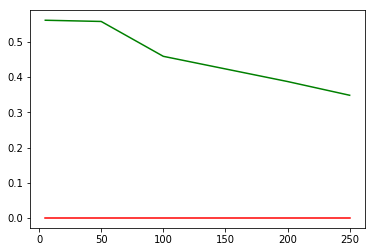

Working on... FB
0.5
------------
0.4980544747081712
------------
0.5
------------
0.5
------------
0.5021367521367521
------------
0.5
------------
0.5
------------
0.4980544747081712
------------
0.5
------------
0.5
------------
0.5021367521367521
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5291828793774319
------------
0.5
------------
0.5
------------
0.5021367521367521
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----

0.527542372881356
------------
0.502127659574468
------------
0.5598290598290598
------------
0.4894957983193277
------------
0.51875
------------
0.5428015564202334
------------
0.4936440677966102
------------
0.5170212765957447
------------
0.5106837606837606
------------
0.5189075630252101
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4979166666666667
------------
0.4649805447470817
------------
0.5084745762711864
------------
0.4787234042553192
------------
0.4636752136752137
------------
0.5378151260504201
------------
0.50625
------------
0.4805447470817121
------------
0.5572033898305084
------------
0.4787234042553192
------------
0.46153846153846156
------------
0.5441176470588235
------------
0.50208333333

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.5217391304347826
------------
0.5811320754716981
------------
0.5843137254901961
------------
0.621900826446281
------------
0.5170940170940171
------------
0.569327731092437
------------
0.5507246376811594
------------
0.5584905660377358
------------
0.5901960784313726
------------
0.5165289256198347
------------
0.44017094017094016
------------
0.5756302521008403
------------
0.45108695652173914
------------
0.5528301886792453
------------
0.5882352941176471
------------
0.4855371900826446
------------
0.4722222222222222
------------
0.6512605042016807
------------
0.6032608695652174
------------
0.6245283018867924
------------
0.5019607843137255
------------
0.5557851239669421
------------
0.4893162393162393
------------
0.523109243697479
------------
0.4963768115942029
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4844827586206897
------------
0.5
------------
0.5
------------
0.5
------------
0.8308823529411765
------------
0.6484375
------------
0.603448275862069
------------
0.7702205882352942
------------
0.635593220338983
------------
0.5929054054054054
------------
0.8338235294117647
------------
0.6015625
------------
0.5603448275862069
------------
0.6507352941176471
------------
0.6080508474576272
------------
0.5641891891891891
------------
0.8308823529411765
------------
0.560546875
------------
0.3689655172413793
------------
0.625
------------
0.5614406779661016
------------
0.6537162162162162
------------
0.8
------------
0.482421875
------------
0.5051724137931034
------------
0.4963235294117647

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.657258064516129
------------
0.5765957446808511
------------
0.5721830985915493
------------
0.5
------------
0.476
------------
0.6069868995633187
------------
0.6653225806451613
------------
0.5276595744680851
------------
0.5492957746478874
------------
0.5079872204472844
------------
0.502
------------
0.5240174672489083
------------
0.6895161290322581
------------
0.5063829787234042
------------
0.5264084507042254
------------
0.49201277955271566
------------
0.514
------------
0.48034934497816595
------------
0.5060483870967742
------------
0.5042553191489362
------------
0.545774647887324
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.582
------------
0.5305676855895196
------------
0.653225

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.59765625
------------
0.546875
------------
0.6292134831460674
------------
0.5666666666666667
------------
0.7552447552447552
------------
0.5036630036630036
------------
0.701171875
------------
0.7254464285714286
------------
0.6891385767790262
------------
0.6078431372549019
------------
0.7552447552447552
------------
0.5677655677655677
------------
0.6640625
------------
0.71875
------------
0.6460674157303371
------------
0.6137254901960785
------------
0.7517482517482518
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--------

0.4542124542124542
------------
0.607421875
------------
0.6607142857142857
------------
0.6404494382022472
------------
0.5470588235294118
------------
0.7447552447552448
------------
0.5036630036630036
------------
0.486328125
------------
0.5022321428571429
------------
0.5056179775280899
------------
0.5470588235294118
------------
0.5087412587412588
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
Diff in tren train and test
0.5518099547511313
0.9058823529411765
Window: 250
[[ 54  50]
 [447 554]]
Vol pos 4.9816901942859415
Vol neg 2.9786041723588954
F1,score 0.690342679127726
Accuracy: 0.5502262443438914
[0, 0, 0, 0, 0]
[0.5259965337954939, 0.5938864628820961, 0.505726872246696, 0.4565022421524664, 0.550226244343891

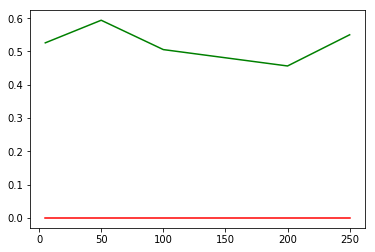

Working on... INTC
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5106837606837606
------------
0.49137931034482757
------------
0.4919678714859438
------------
0.5476190476190477
------------
0.5
------------
0.5319148936170213
------------
0.5512820512820513
------------
0.47198275862068967
------------
0.4799196787148594
------------
0.5595238095238095
------------
0.5684647302904564
------------
0.5893617021276596
------------
0.5277777777777778
------------
0.5452586206896551
------------
0.5341365461847389
------------
0.4166666666666667
------------
0.558091286307054
------------
0.548936170212766
------------
0.4935897435897436
------------
0.5193965517241379
------------
0.5682730923694779
------------
0.44642857142857145
------------
0.58298755186722
------------
0.5702127659574469
------------
0.46153846153846156
------------
0.5538793103448276
------------
0.463855421686747
------------
0.4523809523809524
------------
0.533195020746888
------------
0.50

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5085106382978724
------------
0.5546558704453441
------------
0.5173611111111112
------------
0.62
------------
0.4980769230769231
------------
0.5
------------
0.4978723404255319
------------
0.5020242914979757
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----

0.5
------------
0.5340425531914894
------------
0.5748987854251012
------------
0.5381944444444444
------------
0.5127272727272727
------------
0.5923076923076923
------------
0.6461267605633803
------------
0.5063829787234042
------------
0.5748987854251012
------------
0.5711805555555556
------------
0.49818181818181817
------------
0.5769230769230769
------------
0.6161971830985915
------------
0.49361702127659574
------------
0.597165991902834
------------
0.5607638888888888
------------
0.49818181818181817
------------
0.46923076923076923
------------
0.4154929577464789
------------
0.44042553191489364
------------
0.6295546558704453
------------
0.5868055555555556
------------
0.5127272727272727
------------
0.5846153846153846
------------
0.5809859154929577
------------
0.4702127659574468
------------
0.6214574898785425
------------
0.6440972222222222
------------
0.5109090909090909
------------
0.4442307692307692
------------
0.5933098591549296
------------
0.5297872340425532


0.5983870967741935
------------
0.5098684210526315
------------
0.6071428571428571
------------
0.4966887417218543
------------
0.5104895104895105
------------
0.4826388888888889
------------
0.49516129032258066
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6024305555555556
------------
0.7548387096774194
------------
0.5
------------
0.5
------------
0.5281456953642384
------------
0.5559440559440559
------------
0.5902777777777778
------------
0.5145161290322581
------------
0.5016447368421053
------------
0.5
------------
0.46192052980132453
------------
0.534965034965035
------------
0.59375
------------
0.4967741935483871
------------
0.5
-----

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0

0.8211678832116789
------------
0.6565495207667732
------------
0.5496894409937888
------------
0.5976430976430976
------------
0.7218045112781954
------------
0.8338461538461538
------------
0.7627737226277372
------------
0.6853035143769968
------------
0.577639751552795
------------
0.34175084175084175
------------
0.7236842105263158
------------
0.5
------------
0.5072992700729927
------------
0.49201277955271566
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5184615384615384
------------
0.5784671532846716
------------
0.5670926517571885
------------
0.5201863354037267
------------
0.5286195286195287
------------
0.7669172932330827
------------
0.509230769230769

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.44108761329305135
------------
0.5
------------
0.5
------------
0.5
------------
0.49206349206349204
------------
0.587037037037037
------------
0.6012084592145015
------------
0.6185064935064936
------------
0.5390879478827362
------------
0.7979591836734694
------------
0.5222222222222223
------------
0.5685185185185185
------------
0.6631419939577039
------------
0.7694805194805194
------------
0.5228013029315961
------------
0.8755102040816326
------------
0.7428571428571429
------------
0.5407407407407407
------------
0.6419939

0.553968253968254
------------
0.8092592592592592
------------
0.6993957703927492
------------
0.6396103896103896
------------
0.5423452768729642
------------
0.8346938775510204
------------
0.5126984126984127
------------
0.8611111111111112
------------
0.7054380664652568
------------
0.6525974025974026
------------
0.5342019543973942
------------
0.8285714285714286
------------
0.7746031746031746
------------
0.8074074074074075
------------
0.7220543806646526
------------
0.711038961038961
------------
0.5765472312703583
------------
0.810204081632653
------------
0.5
------------
0.5037037037037037
------------
0.5
------------
0.4967532467532468
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--

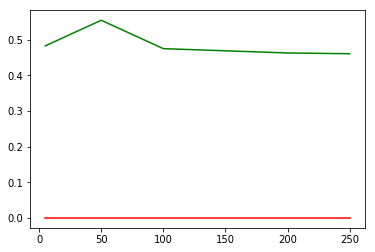

Working on... CSCO
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--------

0.49612403100775193
------------
0.504
------------
0.47035573122529645
------------
0.4935897435897436
------------
0.5103734439834025
------------
0.6030534351145038
------------
0.4903100775193798
------------
0.484
------------
0.5355731225296443
------------
0.5299145299145299
------------
0.491701244813278
------------
0.5343511450381679
------------
0.5174418604651163
------------
0.442
------------
0.5296442687747036
------------
0.4935897435897436
------------
0.508298755186722
------------
0.5572519083969466
------------
0.437984496124031
------------
0.442
------------
0.5138339920948617
------------
0.49572649572649574
------------
0.4854771784232365
------------
0.5
------------
0.49224806201550386
------------
0.5
------------
0.49604743083003955
------------
0.49786324786324787
------------
0.4979253112033195
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----------

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.48442367601246106
------------
0.49101796407185627
------------
0.44809688581314877
------------
0.4132841328413284
------------
0.49619771863117873
------------
0.4744525547445255
------------
0.48442367601246106
------------
0.49101796407185627
------------
0.4429065743944637
------------
0.4132841328413284
------------
0.49619771863117873
------------
0.4781021897810219
------------
0.48130841121495327
------------
0.4805389221556886


0.5
------------
0.5
------------
0.6339563862928349
------------
0.49850299401197606
------------
0.4982698961937716
------------
0.36531365313653136
------------
0.5076045627376425
------------
0.4981751824817518
------------
0.5218068535825545
------------
0.49850299401197606
------------
0.4844290657439446
------------
0.34501845018450183
------------
0.5095057034220533
------------
0.49635036496350365
------------
0.5093457943925234
------------
0.47604790419161674
------------
0.4342560553633218
------------
0.3339483394833948
------------
0.5038022813688213
------------
0.5985401459854015
------------
0.21339563862928349
------------
0.45209580838323354
------------
0.4602076124567474
------------
0.3118081180811808
------------
0.5304182509505704
------------
0.4562043795620438
------------
0.5545171339563862
------------
0.437125748502994
------------
0.6262975778546713
------------
0.3634686346863469
------------
0.5475285171102662
------------
0.40693430656934304
-----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5396825396825397
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.7122302158273381
------------
0.5291005291005291
------------
0.5
------------
0.5
------------
0.34363636363636363
------------
0.45714285714285713
------------
0.7086330935251799
---

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.5
------------
0.5
------------
0.513095238095238
------------
0.5
------------
0.5
------------
0.49528301886792453
------------
0.5
------------
0.7509578544061303
------------
0.5583333333333333
------------
0.5
------------
0.5
------------
0.39937106918238996
------------
0.5355731225296443
------------
0.7796934865900383
------------
0.6488095238095238
------------
0.4964788732394366
------------
0.4965753424657534
------------
0.690251572327044
------------
0.549407114624506
------------
0.5957854406130269
------------
0.6714285714285714
------------
0.49765258215962443
------------
0.4982876712328767
------------
0.7971698113207547
------------
0.5731225296442688
------------
0.5823754789272031
------------
0.4988095238095238
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5

1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.9909502262443439
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.25565610859728505
------------
0.99321266968325

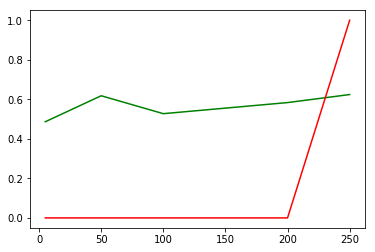

Working on... CMCSA
0.5
------------
0.5
------------
0.45491803278688525
------------
0.5020833333333333
------------
0.5095785440613027
------------
0.5173160173160173
------------
0.5
------------
0.5
------------
0.4610655737704918
------------
0.5020833333333333
------------
0.5134099616858238
------------
0.5173160173160173
------------
0.5
------------
0.5
------------
0.45901639344262296
------------
0.5041666666666667
------------
0.5076628352490421
------------
0.5194805194805194
------------
0.5
------------
0.5
------------
0.5122950819672131
------------
0.5041666666666667
------------
0.5632183908045977
------------
0.5086580086580087
------------
0.5082304526748971
------------
0.547244094488189
------------
0.5286885245901639
------------
0.5083333333333333
------------
0.6015325670498084
------------
0.5194805194805194
------------
0.5
------------
0.5
------------
0.5081967213114754
------------
0.48125
------------
0.5325670498084292
------------
0.49567099567099565


0.5098425196850394
------------
0.5225409836065574
------------
0.5166666666666667
------------
0.5038314176245211
------------
0.487012987012987
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.48565573770491804
------------
0.5041666666666667
------------
0.5172413793103449
------------
0.5108225108225108
------------
0.5
------------
0.5610236220472441
------------
0.5286885245901639
------------
0.48541666666666666
------------
0.5957854406130269
------------
0.5238095238095238
------------
0.5
------------
0.47834645669291337
------------
0.5245901639344263
------------
0.4791666666666667
------------
0.6053639846743295
------------
0.5108225108225108
------------
0.54732510288065

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.42248062015503873
------------
0.46975806451612906
------------
0.5784313725490197
------------
0.5884476534296029
------------
0.5764331210191083
------------
0.5448717948717948
------------
0.42248062015503873
------------
0.46774193548387094
------------
0.5764705882352941
------------
0.5884476534296029
------------
0.5764331210191083
------------
0.5448717948717948
------------
0.42248062015503873
------------
0.46975806451612906
------------
0.5823529411764706
------------
0.5884476534296029
------------
0.5812101910828026
------------
0.538461

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4263565891472868
------------
0.4596774193548387
------------
0.5901960784313726
------------
0.5902527075812274
------------
0.5732484076433121
------------
0.532051282051282
------------
0.4573643410852713
------------
0.5625
------------
0.49607843137254903
------------
0.6516245487364621
------------
0.5621019108280255
------------
0.5705128205128205
------------
0.45348837209302323
------------
0.4899193548387097
------------
0.5098039215686274
------------
0.648014440433213
------------
0.571656050955414
------------
0.6132478632478633
------------
0.5348837209302325
------------
0.49193548387096775
------------
0.5372549019607843
------------
0.628158844765343
------------
0.5605095541401274
------------
0.5598290598290598
------------
0.4844961240310077
------------
0.5201612903225806
------------
0.5294117647058824
------------
0.3844765342960289
------------
0.5828025477707006
------------
0.476495726495726

0.5063694267515924
------------
0.6083086053412463
------------
0.5407725321888412
------------
0.6003521126760564
------------
0.7435158501440923
------------
0.5
------------
0.5063694267515924
------------
0.6083086053412463
------------
0.5407725321888412
------------
0.602112676056338
------------
0.7420749279538905
------------
0.5
------------
0.5031847133757962
------------
0.6068249258160238
------------
0.5386266094420601
------------
0.602112676056338
------------
0.7420749279538905
------------
0.5
------------
0.5063694267515924
------------
0.5905044510385756
------------
0.5300429184549357
------------
0.5845070422535211
------------
0.7997118155619597
------------
0.5276595744680851
------------
0.5222929936305732
------------
0.5637982195845698
------------
0.5901287553648069
------------
0.5
------------
0.45244956772334294
------------
0.5
------------
0.5
------------
0.5415430267062314
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------

0.6642651296829971
------------
0.6510638297872341
------------
0.6194267515923567
------------
0.6528189910979229
------------
0.4270386266094421
------------
0.4102112676056338
------------
0.6801152737752162
------------
0.6468085106382979
------------
0.606687898089172
------------
0.29080118694362017
------------
0.5278969957081545
------------
0.49295774647887325
------------
0.4265129682997118
------------
0.5063829787234042
------------
0.5015923566878981
------------
0.5756676557863502
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.596830985915493
------------
0.5922190201729106
------------
0.5787234042553191
------------
0.589171974522293
------------
0.5296735905044511
------------
0.5708

0.6484641638225256
------------
0.6601123595505618
------------
0.5797297297297297
------------
0.5334728033472803
------------
0.6030405405405406
------------
0.7605820105820106
------------
0.6757679180887372
------------
0.5014044943820225
------------
0.5054054054054054
------------
0.5
------------
0.5
------------
0.4708994708994709
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.33707865168539325
------------
0.668918918918919
------------
0.5418410041841004
------------
0.5641891891891891
------------
0.7063492063492064
------------
0.643344709897611
------------
0.33707865168539325
----------

0.49859550561797755
------------
0.5027027027027027
------------
0.4581589958158996
------------
0.5202702702702703
------------
0.36243386243386244
------------
0.49146757679180886
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6882022471910112
------------
0.5621621621621622
------------
0.47280334728033474
------------
0.7297297297297297
------------
0.582010582010582
------------
0.6552901023890785
------------
0.7134831460674157
------------
0.5608108108108109
------------
0.4686192468619247
------------
0.5236486486486487
------------
0.5753968253968254
------------
0.6416382252559727
------------
0.7373595505617978
------------
0.5337837837837838
------------
0.4581589958158996
------------
0.7331081081081081


0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.7235449735449735
------------
0.7025316455696202
------------
0.5
------------
0.5
------------
0.6973995271867612
------------
0.6014234875444839
------------
0.7235449735449735
------------
0.7025316455696202
------------
0.5
------------
0.5
------------
0.6985815602836879
------------
0.604982206405694
------------
0.7222222222222222
------------
0.6949367088607595
------------
0.5
------------
0.5
------------
0.6985815602836879
------------
0.6014234875444839
------------
0.7195767195767195
------------
0.6683544303797468
------------
0.5
------------
0.5
------------
0.706855791962175
------------
0.604982206405694
------------
0.6521164021164021
------------
0.6443037974683544
------------
0.5042372881355932
------------
0.5
------------
0.2565011820330969
------------
0.597864768683274
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----

0.6189873417721519
------------
0.4745762711864407
------------
0.5939226519337016
------------
0.1773049645390071
------------
0.708185053380783
------------
0.7037037037037037
------------
0.6151898734177215
------------
0.5084745762711864
------------
0.6104972375690608
------------
0.6607565011820331
------------
0.6708185053380783
------------
0.3002645502645503
------------
0.5962025316455696
------------
0.4872881355932203
------------
0.6229281767955801
------------
0.6371158392434988
------------
0.6530249110320284
------------
0.5026455026455027
------------
0.5012658227848101
------------
0.4661016949152542
------------
0.5082872928176796
------------
0.41371158392434987
------------
0.4928825622775801
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----

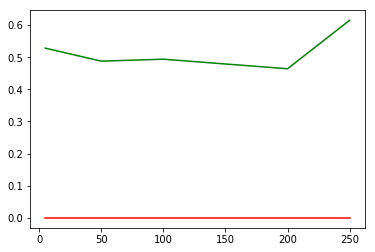

Working on... NVDA
0.5508130081300813
------------
0.3894927536231884
------------
0.5228215767634855
------------
0.5286885245901639
------------
0.5370370370370371
------------
0.5021551724137931
------------
0.5508130081300813
------------
0.3894927536231884
------------
0.5228215767634855
------------
0.5286885245901639
------------
0.5432098765432098
------------
0.5
------------
0.5508130081300813
------------
0.38768115942028986
------------
0.5228215767634855
------------
0.5307377049180327
------------
0.5473251028806584
------------
0.5021551724137931
------------
0.5548780487804879
------------
0.39492753623188404
------------
0.529045643153527
------------
0.5348360655737705
------------
0.5411522633744856
------------
0.5086206896551724
------------
0.524390243902439
------------
0.44021739130434784
------------
0.5020746887966805
------------
0.5
------------
0.5
------------
0.49137931034482757
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---------

0.552536231884058
------------
0.533195020746888
------------
0.5245901639344263
------------
0.5370370370370371
------------
0.48060344827586204
------------
0.49796747967479676
------------
0.5036231884057971
------------
0.5
------------
0.5
------------
0.5041152263374485
------------
0.5064655172413793
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5304878048780488
------------
0.3967391304347826
------------
0.5269709543568465
------------
0.5204918032786885
------------
0.5452674897119342
------------
0.5107758620689655
------------
0.5101626016260162
------------
0.4528985507246377
------------
0.5020746887966805
------------
0.5040983606557377
------------
0.5164609053497943
------------
0.4978448275862069
-

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5163636363636364
------------
0.6719745222929936
------------
0.397887323943662
------------
0.4869402985074627
------------
0.5317460317460317
------------
0.6042553191489362
------------
0.5163636363636364
------------
0.6735668789808917
------------
0.397887323943662
------------
0.4869402985074627
------------
0.5317460317460317
------------
0.6042553191489362
------------
0.5163636363636364
------------
0.6799363057324841
------------
0.4084507042253521
------------
0.48507462686567165
------------
0.5218253968253969
-----------

0.32802547770700635
------------
0.4454225352112676
------------
0.710820895522388
------------
0.5952380952380952
------------
0.5468085106382978
------------
0.5
------------
0.4984076433121019
------------
0.5
------------
0.5
------------
0.498015873015873
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.445859872611465
------------
0.5
------------
0.48880597014925375
------------
0.5
------------
0.5
------------
0.5036363636363637
------------
0.4315286624203822
------------
0.5035211267605634
------------
0.44216417910447764
------------
0.5
------------
0.4978723404255319
------------
0.47454545454545455
------------
0.4124203821656051
------------
0.4894366197183099
---------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----------

0.5464135021097046
------------
0.4964912280701754
------------
0.43844221105527637
------------
0.503125
------------
0.3771186440677966
------------
0.5778688524590164
------------
0.6244725738396625
------------
0.47543859649122805
------------
0.43467336683417085
------------
0.65625
------------
0.4152542372881356
------------
0.5471311475409836
------------
0.6075949367088608
------------
0.5228070175438596
------------
0.8505025125628141
------------
0.396875
------------
0.565677966101695
------------
0.5799180327868853
------------
0.5421940928270043
------------
0.5017543859649123
------------
0.3969849246231156
------------
0.4078125
------------
0.5254237288135594
------------
0.5573770491803278
------------
0.540084388185654
------------
0.45087719298245615
------------
0.3756281407035176
------------
0.4265625
------------
0.625
------------
0.5594262295081968
------------
0.5527426160337553
------------
0.5
------------
0.49874371859296485
------------
0.5
------------
0

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4984375
------------
0.40789473684210525
------------
0.7254901960784313
------------
0.4560669456066946
------------
0.5060483870967742
------------
0.5517241379310345
------------
0.5
------------
0.4557416267942584
------------
0.7663398692810458
------------
0.5
------------
0.5
------------
0.5043103448275862
------------
0.5
------------
0.4557416267942584
------------
0.5
------------
0.4121338912133891
------------
0.5
------------
0.6077586206896551
------------
0.5078125
------------
0.4437799043062201
------------
0.5032679738562091
------------
0.5083682008368201
------------
0.6209677419354839
------------
0.8060344827586207
------------
0.528125
------------
0.41866028708133973
------------
0.3300653594771242
------------
0.6903765690376569
------------
0.5887096774193549
------------
0

0.510593220338983
------------
0.5315315315315315
------------
0.49847560975609756
------------
0.4700460829493088
------------
0.5097402597402597
------------
0.5
------------
0.5
------------
0.5045045045045045
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.49847560975609756
------------
0.4400921658986175
------------
0.5032467532467533
------------
0.4918032786885246
------------
0.5148305084745762
------------
0

0.4665898617511521
------------
0.5941558441558441
------------
0.7459016393442623
------------
0.5995762711864406
------------
0.6441441441441441
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.47235023041474655
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4596774193548387
------------
0.5275974025974026
------------
0.5
------------
0.6059322033898306
------------
0.75
------------
0.49390243902439024
------------
0.4539170506912442
------------
0.6282467532467533
------------
0.6045081967213115
------------
0.6165254237288136
------------
0.772

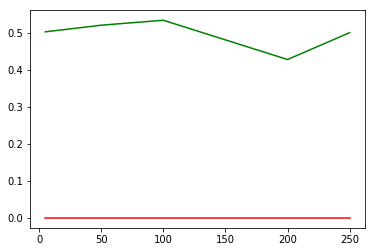

Working on... NFLX
0.574468085106383
------------
0.40111940298507465
------------
0.549800796812749
------------
0.4362934362934363
------------
0.44466403162055335
------------
0.42653061224489797
------------
0.574468085106383
------------
0.40111940298507465
------------
0.5517928286852589
------------
0.4362934362934363
------------
0.44466403162055335
------------
0.42448979591836733
------------
0.5765957446808511
------------
0.39925373134328357
------------
0.549800796812749
------------
0.4362934362934363
------------
0.44861660079051385
------------
0.4346938775510204
------------
0.5829787234042553
------------
0.3880597014925373
------------
0.5517928286852589
------------
0.4343629343629344
------------
0.4881422924901186
------------
0.5
------------
0.5936170212765958
------------
0.5186567164179104
------------
0.547808764940239
------------
0.5
------------
0.5
------------
0.5
------------
0.4957446808510638
------------
0.5149253731343284
------------
0.5
----------

0.5598455598455598
------------
0.5237154150197628
------------
0.5510204081632653
------------
0.5425531914893617
------------
0.5279850746268657
------------
0.6055776892430279
------------
0.581081081081081
------------
0.45652173913043476
------------
0.4959183673469388
------------
0.5234042553191489
------------
0.498134328358209
------------
0.4960159362549801
------------
0.5019305019305019
------------
0.4980237154150198
------------
0.4897959183673469
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5787234042553191
------------
0.39365671641791045
------------
0.5358565737051793
------------
0.43822393822393824
------------
0.5019762845849802
------------
0.5020408163265306
------------
0.5404255319148936
--

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.49636363636363634
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----------

KeyboardInterrupt: 

In [4]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5,50,100,200,250]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=balanceup(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    prediction=rbf_svm.predict(x_val)
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=balanceup(x_val,y_val)
                    else:
                        totu=totu+1
                        
                    print(rbf_svm.score(x_val,y_val))
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    print('------------')
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        x_tv,y_tv=balanceup(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()